# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from IPython.core import display as ICD
from itertools import combinations

# Import Data + Preprocessing 
1. Replace NaN by 0
2. Rename first Column

In [2]:
data = 'city_UrbanAtlas_l1_ratios.csv'
df = pd.read_csv(data)
df = df.fillna(0)
df = df.rename(columns={"Unnamed: 2": "No Class"})

In [3]:
df.head()

,cc_code_short,cc_name,No Class,Agricultural areas,Artificial surfaces,Natural and semi-natural areas,Water,Wetlands
0,AL001,Tirana(FUA name),0.0,0.142073,0.773865,0.064179,0.013398,0.006484
1,AL003,Elbasan(FUA name),0.0,0.072055,0.656564,0.271382,0.000000,0.000000
2,AL004,ShkodÃ«r(FUA name),0.0,0.321917,0.605617,0.052717,0.015167,0.004583
3,AT001,Wien,0.0,0.158471,0.623209,0.182559,0.035760,0.000000
4,AT002,Graz,0.0,0.145966,0.585422,0.261324,0.007288,0.000000


# Get Features
We have 6 features: 5 classes ratios + non-classified regions

In [4]:
X = df.copy()
y = df['cc_name']
X.drop(['cc_code_short', 'cc_name'], axis=1, inplace=True)
X.head()

,No Class,Agricultural areas,Artificial surfaces,Natural and semi-natural areas,Water,Wetlands
0,0.0,0.142073,0.773865,0.064179,0.013398,0.006484
1,0.0,0.072055,0.656564,0.271382,0.000000,0.000000
2,0.0,0.321917,0.605617,0.052717,0.015167,0.004583
3,0.0,0.158471,0.623209,0.182559,0.035760,0.000000
4,0.0,0.145966,0.585422,0.261324,0.007288,0.000000


# K-Means call with Elbow method
To find the optimal K

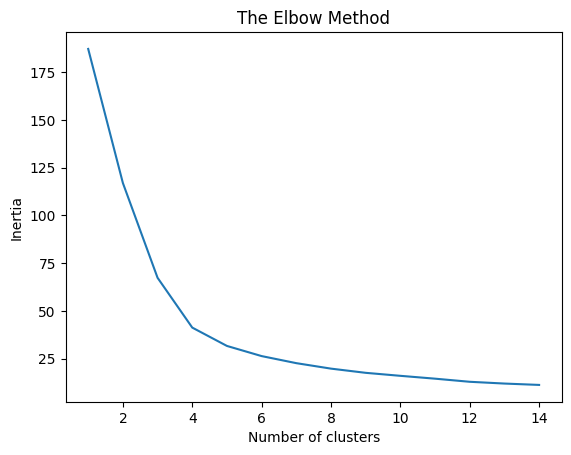

In [5]:
cs = []
max = 15
for i in range(1, max):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, max), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Use K = 4
According to the above plot, 4 looks a good condidate (the elbow point)

In [6]:
k = 4
kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(X)
df['label'] = kmeans.labels_

# Statistics

In [7]:
print("Inertia: ", kmeans.inertia_)
print("Number of clusters: ", kmeans.n_clusters)
u_labels = np.unique(kmeans.labels_)
for i in u_labels:
    print("Number of elements clustered as ", i, "->", len(df[df['label'] == i]))

Inertia:  41.230345209397605
Number of clusters:  4
Number of elements clustered as  0 -> 275
Number of elements clustered as  1 -> 56
Number of elements clustered as  2 -> 415
Number of elements clustered as  3 -> 296


In [ ]:
fig, ax = plt.subplots()
df['label'].value_counts().plot(ax=ax, kind='bar')

# Overview of every cluster

In [ ]:
for i in u_labels:
    ICD.display(df[df['label'] == i])

# Plot the clusters 
For every pair of attributes, plot the 4 clusters

In [ ]:
features = [*range(2, len(X.columns)+2)]
pairs = list(combinations(features, 2))

In [ ]:
import seaborn as sns
columns= df.columns.values.tolist()
for j in pairs:
    fig, ax = plt.subplots()
    ax = sns.scatterplot(x=columns[j[0]],y=columns[j[1]],hue = 'label',data = df,legend='full',
                         palette = {0:'red',1:'orange',2:'yellow',3:'green'})
    plt.xlabel(columns[j[0]])
    plt.ylabel(columns[j[1]])
    plt.show()

# Conclusion 
The clusters have this possible significations:
1. Cluster 0: Cities with more Natural and semi-natural areas.
2. Cluster 1: Cities with more No-class classification.
3. Cluster 2: Cities with more Artificial surfaces.
4. Cluster 3: Cities with more Agricultural areas.